In [1]:
# import modules

from top2vec import Top2Vec
import os

In [2]:
data = {}

# create a dict with the file name as key and the text as value

# for each folder in the "data" folder
for folder in os.listdir('data'):

    # for each file in the folder
    for file in os.listdir('data/' + folder):

        # open the file with utf-8 encoding
        with open('data/' + folder + '/' + file, 'r', encoding="utf-8") as f:

            # read the file
            data[file] = f.read()

In [4]:
# Train Top2Vec model on the data using a universal sentence encoder, which in short, encodes text into a vector of numbers that represent the text.
# For more information on the universal sentence encoder, see https://tfhub.dev/google/universal-sentence-encoder/4
# To speed up training, we set the speed parameter to "fast-learn", which will use less RAM and train faster and use 12 threads.

model = Top2Vec(documents=list(data.values()), speed="fast-learn", workers=12, embedding_model='universal-sentence-encoder')

2022-11-08 15:02:22,263 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-11-08 15:02:24,279 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-11-08 15:02:50,479 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-11-08 15:05:00,379 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-11-08 15:05:06,681 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-11-08 15:05:06,695 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


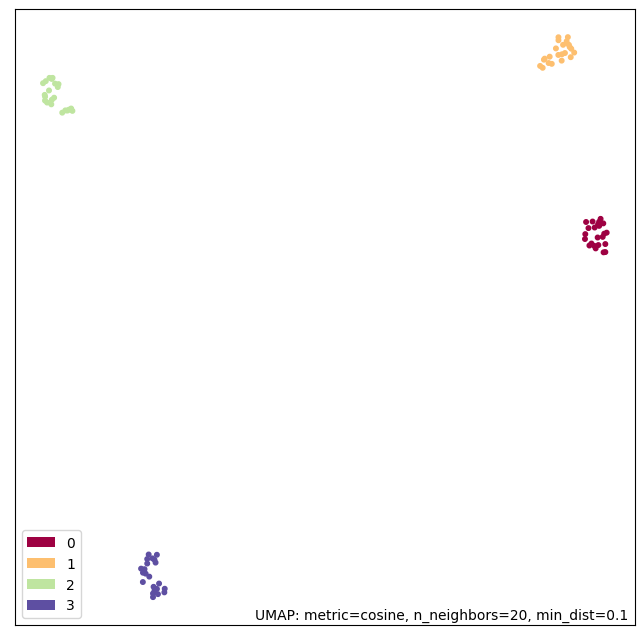

In [5]:
import umap.plot

# Plot the topics using UMAP
umap_args_model = {
"n_neighbors": 20,
"n_components": 2,
"metric": "cosine",
'min_dist':0.10,
'spread':1
}

# get the topic embeddings
reduced_vectors = model.topic_vectors_reduced

# create a UMAP model and fit the topic embeddings
umap_model = umap.UMAP(**umap_args_model).fit(model.document_vectors)

# scatter plot the topics
umap_fig2 = umap.plot.points(umap_model, labels = model.doc_top)

In [6]:
# Get a full list of topics
model.topic_words

array([['margin', 'capex', 'bullish', 'invested', 'leveraging',
        'turnover', 'increasing', 'increases', 'improvements',
        'dividend', 'citigroup', 'incremental', 'leverage', 'quarterly',
        'increase', 'increased', 'cfo', 'earnings', 'profitability',
        'llc', 'dividends', 'lifo', 'revenues', 'accounting',
        'acquisitions', 'expanding', 'forward', 'progress',
        'improvement', 'shareholders', 'rollout', 'asset', 'segment',
        'metrics', 'significant', 'gaap', 'inventory', 'efficiencies',
        'momentum', 'closing', 'impact', 'spending', 'raise', 'measure',
        'revenue', 'largest', 'advance', 'larger', 'expansion',
        'materially'],
       ['bullish', 'leverage', 'growth', 'invested', 'capex',
        'leveraging', 'margin', 'forward', 'increasing', 'citigroup',
        'segment', 'expansion', 'expanding', 'increase', 'llc',
        'increases', 'pharma', 'dividend', 'quarterly', 'analysts',
        'earnings', 'uncertainties', 'analys

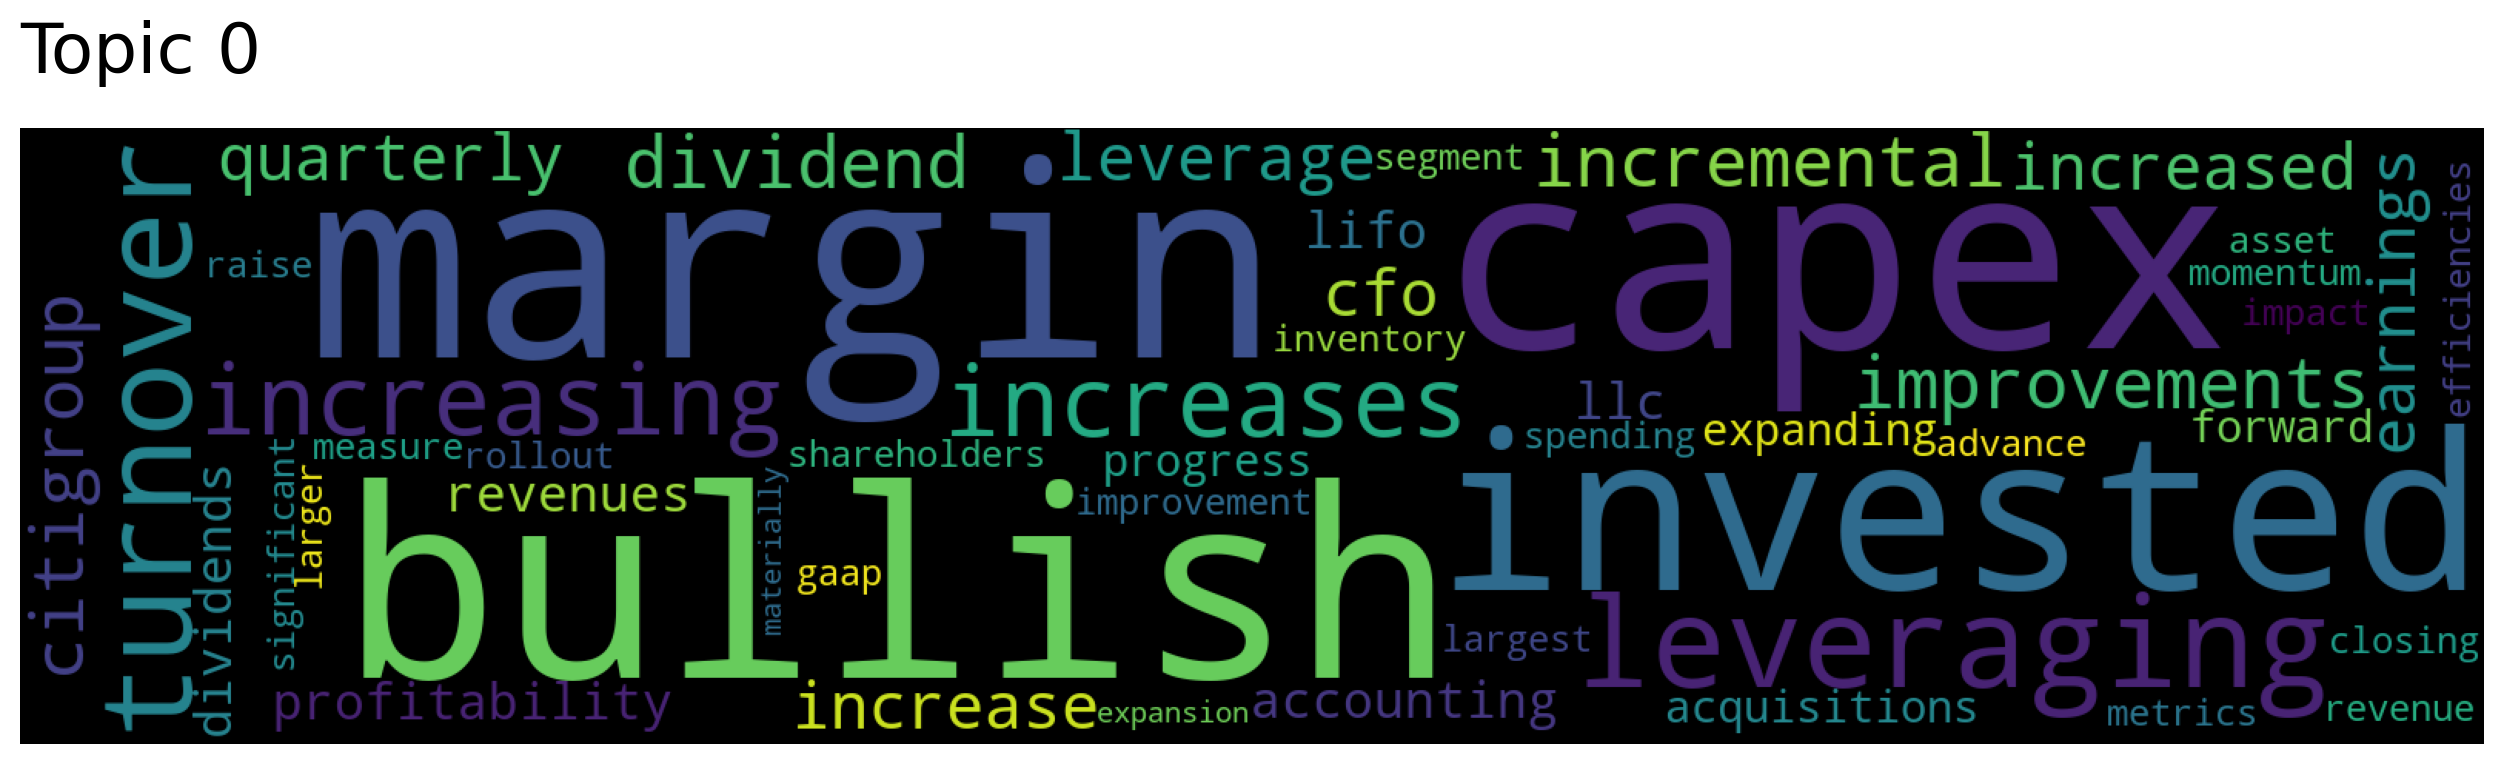

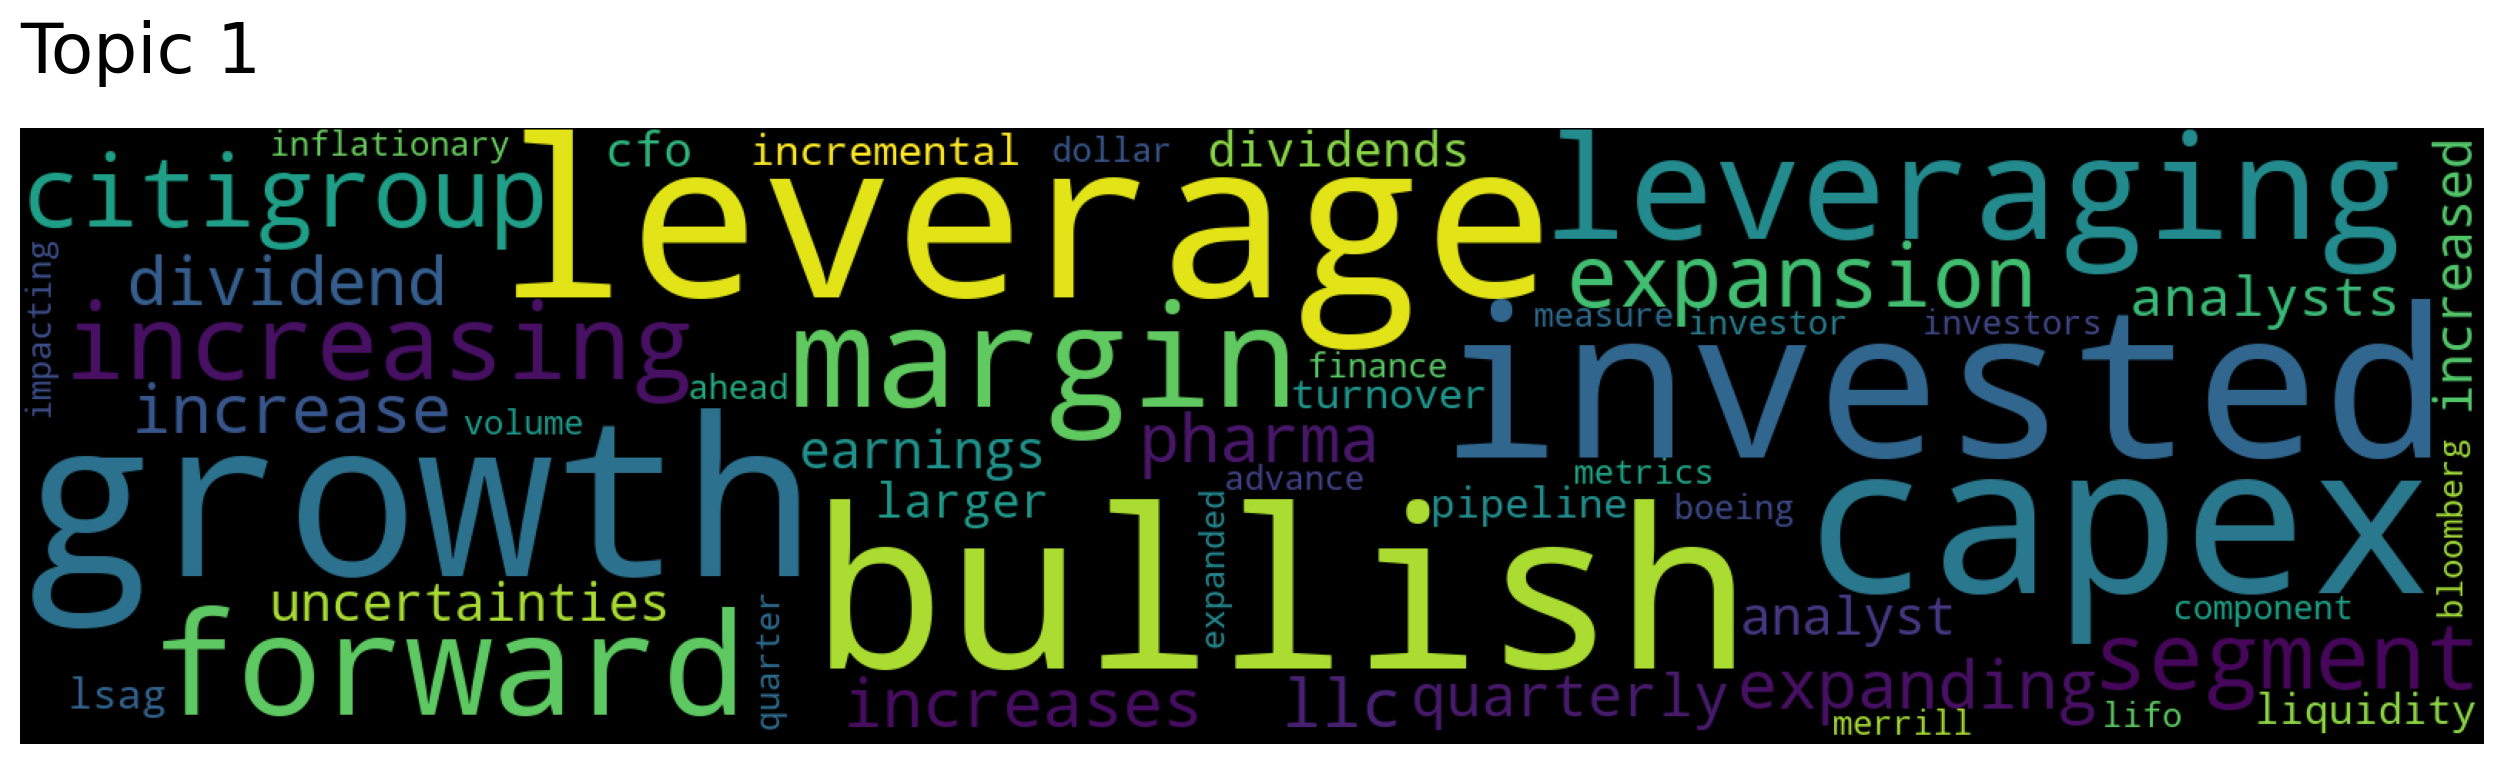

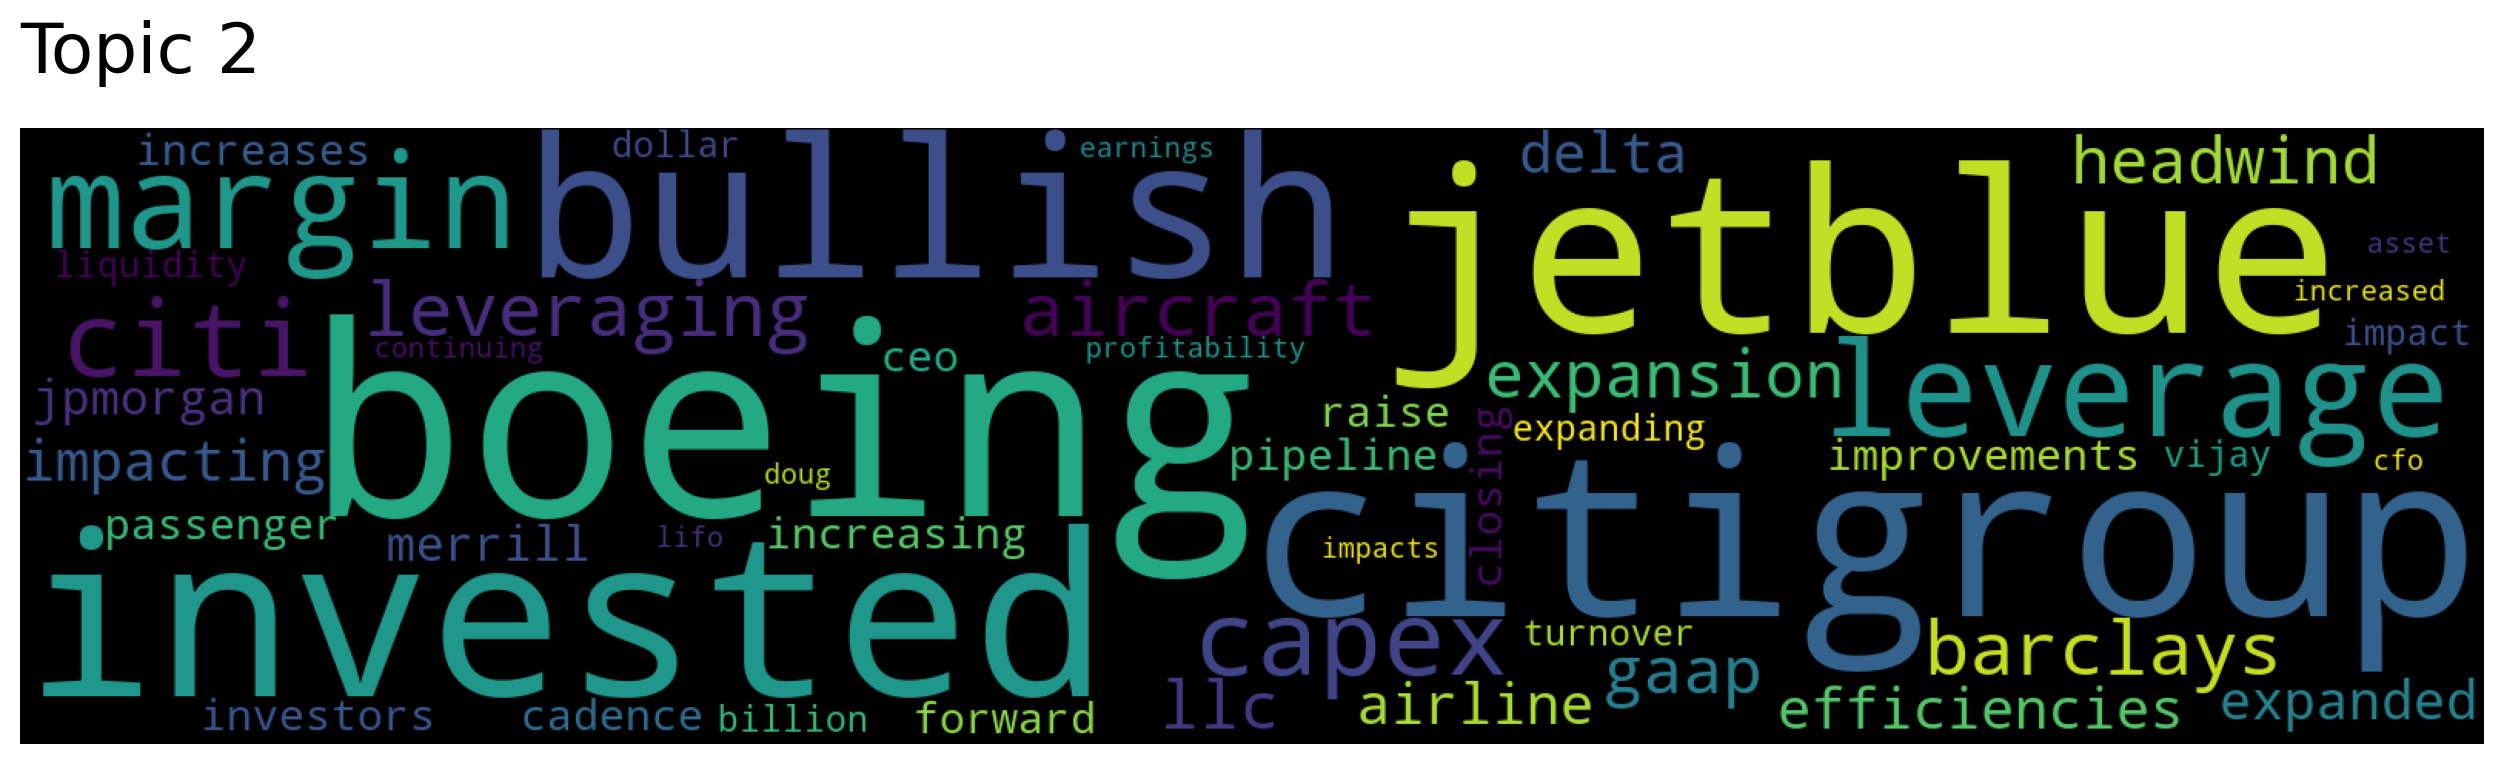

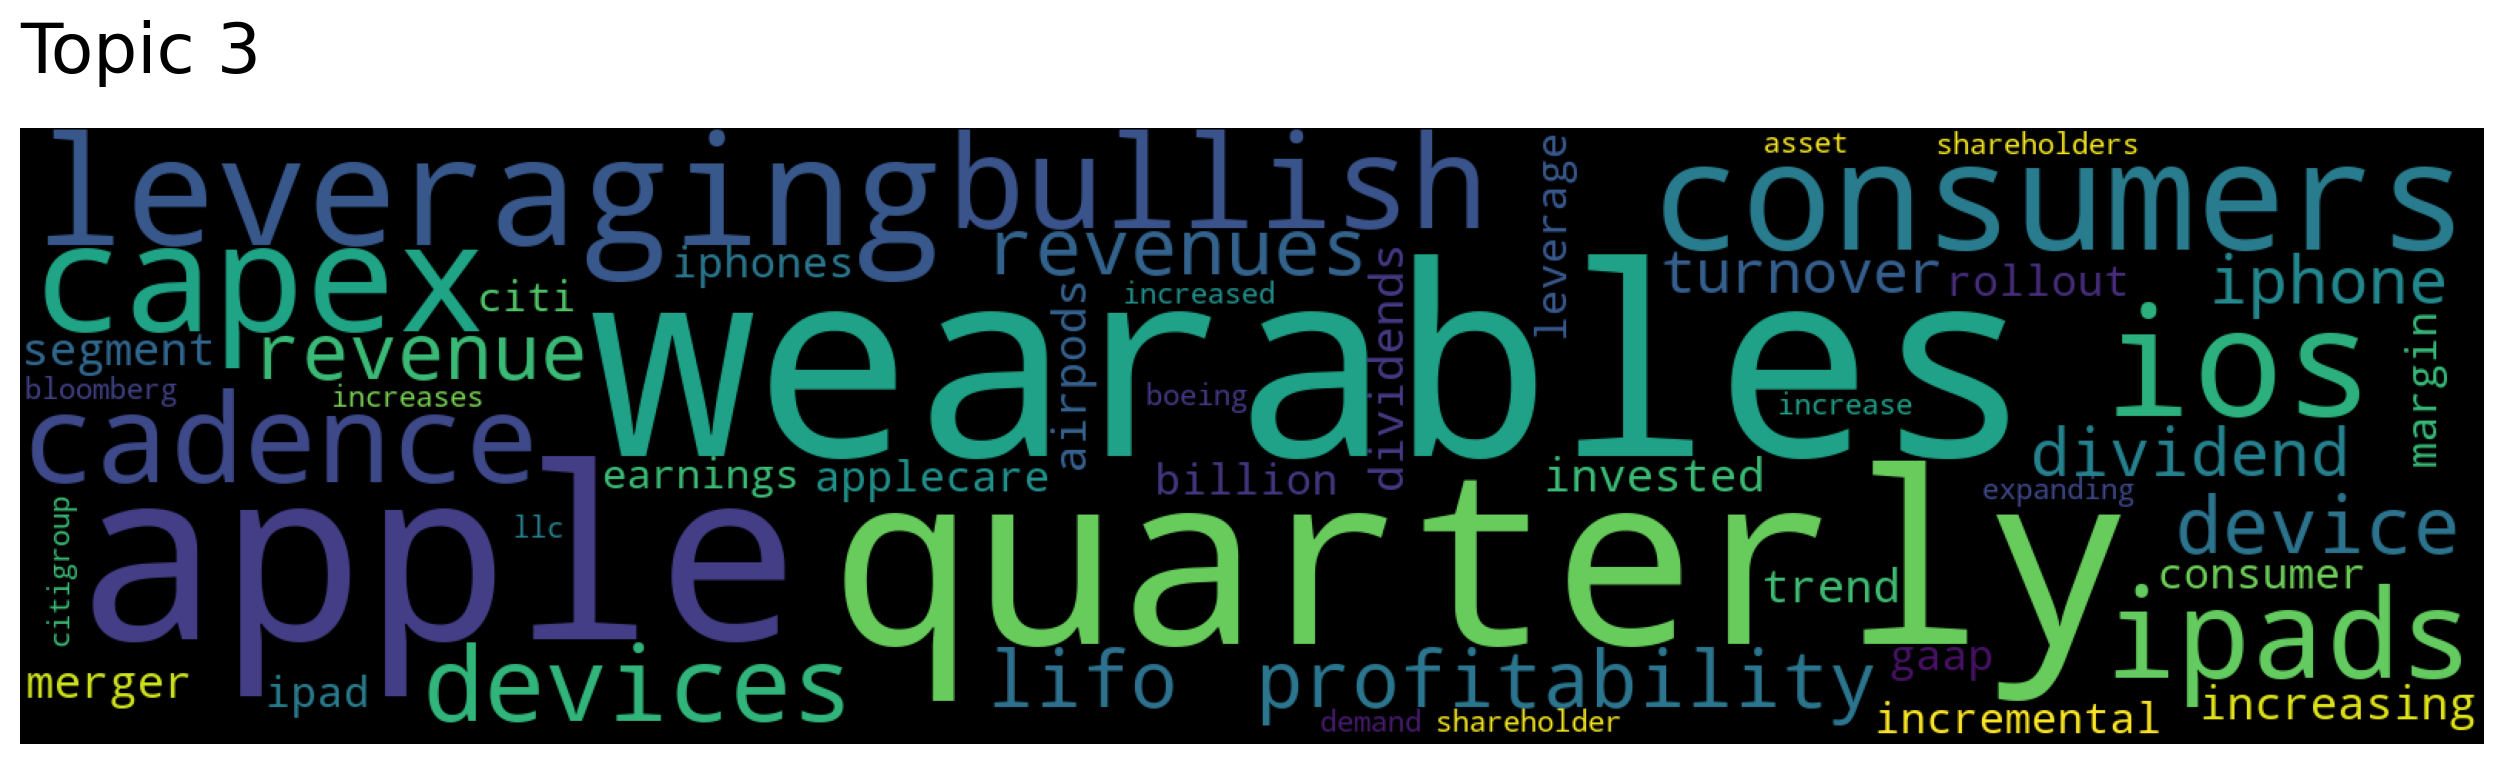

In [7]:
# get all 4 Topics generated by Top2Vec
topic_words, word_scores, topic_nums = model.get_topics(4)

# make a word cloud for each topic
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)